In [37]:
import numpy as np
import matplotlib.pyplot as plt

from ale_py import ALEInterface
from ale_py.roms import LostLuggage
import gymnasium as gym
from tqdm import tqdm

In [38]:
ale = ALEInterface()
ale.loadROM(LostLuggage)

In [39]:
env = gym.make('ALE/LostLuggage-v5')

In [40]:
class QLearningAgent:
    def __init__(self, n_actions,
                 learning_rate = 0.15,
                 discount_factor = 0.85,
                 epsilon = 0.1):
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.Q = np.zeros((n_actions,))
    
    def choose_action(self):
        if np.random.rand() < self.epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(self.Q)
        return action
    
    def update_Q(self, action, reward):
        max_Q = np.max(self.Q)
        current_Q = self.Q[action]
        td_target = reward + self.discount_factor * max_Q
        td_error = td_target - current_Q
        self.Q[action] += self.learning_rate * td_error

    def train(self, env, n_episodes):
        episode_rewards = []

        for episode in range(n_episodes):
            env.reset()
            done = False
            total_reward = 0

            while not done:
                action = self.choose_action()
                next_state, reward, done, _, _ = env.step(action)
                total_reward += reward
                self.update_Q(action, reward)
                state = next_state
            
            print(f"Episode { episode + 1 } : Reward { total_reward }")
            episode_rewards.append(total_reward)
        
        return episode_rewards

In [41]:
agent = QLearningAgent(n_actions=env.action_space.n)

In [42]:
episode_rewards = agent.train(env=env, n_episodes=200)

Episode 1 : Reward 6.0
Episode 2 : Reward 12.0
Episode 3 : Reward 9.0
Episode 4 : Reward 9.0
Episode 5 : Reward 3.0
Episode 6 : Reward 9.0
Episode 7 : Reward 12.0
Episode 8 : Reward 15.0
Episode 9 : Reward 12.0
Episode 10 : Reward 6.0
Episode 11 : Reward 9.0
Episode 12 : Reward 3.0
Episode 13 : Reward 6.0
Episode 14 : Reward 21.0
Episode 15 : Reward 12.0
Episode 16 : Reward 15.0
Episode 17 : Reward 6.0
Episode 18 : Reward 6.0
Episode 19 : Reward 12.0
Episode 20 : Reward 9.0
Episode 21 : Reward 12.0
Episode 22 : Reward 24.0
Episode 23 : Reward 9.0
Episode 24 : Reward 12.0
Episode 25 : Reward 12.0
Episode 26 : Reward 12.0
Episode 27 : Reward 12.0
Episode 28 : Reward 15.0
Episode 29 : Reward 15.0
Episode 30 : Reward 9.0
Episode 31 : Reward 3.0
Episode 32 : Reward 9.0
Episode 33 : Reward 12.0
Episode 34 : Reward 9.0
Episode 35 : Reward 12.0
Episode 36 : Reward 6.0
Episode 37 : Reward 27.0
Episode 38 : Reward 12.0
Episode 39 : Reward 15.0
Episode 40 : Reward 12.0
Episode 41 : Reward 6.0
Epi

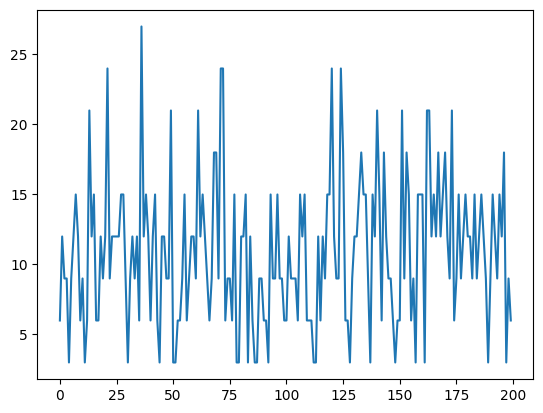

In [43]:
plt.plot(range(200), episode_rewards)